In [34]:
# IMPORTAMOS LOS DATOS
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784',  as_frame=False)

In [21]:
import pandas as pd

df = pd.DataFrame(mnist.data)
df

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# VISUALIZACION DEL CONJUNTO DE DATOS

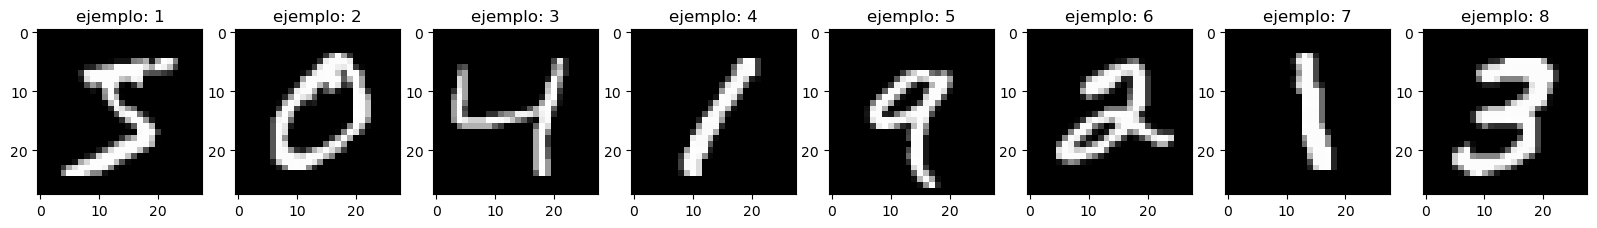

In [23]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))

for index, digit in zip(range(1, 9), mnist.data[:8]):
    plt.subplot(1, 8, index)
    plt.imshow(np.reshape(digit, (28,28)), cmap=plt.cm.gray)
    plt.title('ejemplo: ' + str(index))

plt.show()

DIVISION DEL CONJUNTO DE DATOS

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.15)

In [47]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(50,), activation='logistic', solver='sgd')
clf.fit(X_train, y_train)

C:\Users\PC\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='logistic', hidden_layer_sizes=(50,), solver='sgd')

In [62]:
# PREDICCION CON EL CONJUNTO DE PRUEBAS
y_pred = clf.predict(X_test)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [52]:
from sklearn.metrics import f1_score 

f1_score(y_test, y_pred, average='weighted')

0.9498476915713437

MOSTRANDO LAS IMAGENES MAL CLASIFICADAS

In [54]:
import numpy as np
import matplotlib.pyplot as plt

index = 0
index_errors = []

for label, predict in zip(y_test, y_pred):
    if label != predict:
        index_errors.append(index)
    index += 1

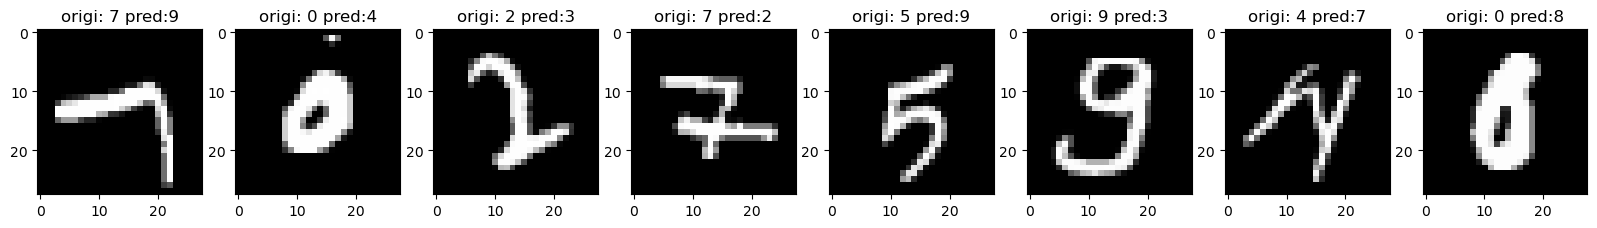

In [58]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 4))

for i, img_index in zip(range(1, 9), index_errors[8:16]):
    plt.subplot(1, 8, i)
    plt.imshow(np.reshape(X_test[img_index], (28, 28)), cmap=plt.cm.gray)
    plt.title('origi: ' + str(y_test[img_index]) + ' pred:'+ str(y_pred[img_index]))
plt.show()